## part 2

In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np
from keras.regularizers import l2, l1
import sklearn

Using TensorFlow backend.


In [2]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [3]:
# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [4]:
def build_model(layer_list):
    '''
    The layer_list is a list of integers, each denoting a layer to
    add with the corresponding number of nodes
    '''
    model = models.Sequential()
    
    for node_count in layer_list:
        model.add(layers.Dense(node_count, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    
    return model

def cross_validate(model_structure):
    '''
    Given a model structure, returns the avg MSE over 10 k-fold
    cross validation training
    
    This facilitates rapid testing of models
    '''
    
    kf = KFold(n_splits = k)
    cur_fold = 0
    for train_index, test_index in kf.split(train_data):
        cur_fold +=1 

        # Partition the data
        x_train, x_test = train_data[train_index], train_data[test_index]
        y_train, y_test = train_targets[train_index], train_targets[test_index]


        model = build_model(model_structure)
        model.fit(x_train, y_train, epochs=num_epochs, batch_size=1)
        val_mse, val_mae = model.evaluate(x_test, y_test)
        all_scores.append(val_mse)
        print("K-FOLD = {}| MSE = {}".format(cur_fold, val_mse ))

    mean_score = np.mean(all_scores)
    return mean_score

In [5]:
from sklearn.model_selection import KFold
k = 10
num_val_samples = len(train_data) // k
num_epochs = 5
all_scores = []

Epoch 1/5
363/363 [==============================] - 2s 4ms/step - loss: 498.5878 - mean_squared_error: 498.5878
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 233.9675 - mean_squared_error: 233.9675
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 76.3699 - mean_squared_error: 76.3699
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 44.8823 - mean_squared_error: 44.8823
Epoch 5/5
41/41 [==============================] - 0s 537us/step
K-FOLD = 1| MSE = 59.19306027016989
Epoch 1/5
363/363 [==============================] - 1s 3ms/step - loss: 476.9468 - mean_squared_error: 476.9468
Epoch 2/5
363/363 [==============================] - 1s 2ms/step - loss: 178.8360 - mean_squared_error: 178.8360
Epoch 3/5
363/363 [==============================] - 1s 2ms/step - loss: 58.0094 - mean_squared_error: 58.0094
Epoch 4/5
363/363 [==============================] - 1s 2ms/step - loss: 39.6259 - mean_squared_error: 39.6259
Epo

364/364 [==============================] - 1s 4ms/step - loss: 444.4832 - mean_squared_error: 444.4832
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 123.4277 - mean_squared_error: 123.4277
Epoch 3/5
364/364 [==============================] - 1s 2ms/step - loss: 44.4996 - mean_squared_error: 44.4996
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 34.8213 - mean_squared_error: 34.8213
Epoch 5/5
40/40 [==============================] - 0s 4ms/step
K-FOLD = 6| MSE = 12.959951400756836
Epoch 1/5
364/364 [==============================] - 1s 4ms/step - loss: 435.2897 - mean_squared_error: 435.2897
Epoch 2/5
364/364 [==============================] - 1s 2ms/step - loss: 136.5617 - mean_squared_error: 136.5617
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 57.0925 - mean_squared_error: 57.0925
Epoch 4/5
364/364 [==============================] - 1s 2ms/step - loss: 42.5035 - mean_squared_error: 42.5035
Epoch 5/5
40/4

363/363 [==============================] - 3s 8ms/step - loss: 352.7192 - mean_squared_error: 352.7192
Epoch 2/5
363/363 [==============================] - 2s 6ms/step - loss: 71.9612 - mean_squared_error: 71.9612
Epoch 3/5
363/363 [==============================] - 2s 6ms/step - loss: 41.0430 - mean_squared_error: 41.0430
Epoch 4/5
363/363 [==============================] - 2s 6ms/step - loss: 31.2097 - mean_squared_error: 31.2097
Epoch 5/5
41/41 [==============================] - 0s 10ms/step
K-FOLD = 1| MSE = 47.187937689990534
Epoch 1/5
363/363 [==============================] - 3s 8ms/step - loss: 389.8057 - mean_squared_error: 389.8057
Epoch 2/5
363/363 [==============================] - 2s 6ms/step - loss: 88.9373 - mean_squared_error: 88.9373
Epoch 3/5
363/363 [==============================] - 2s 6ms/step - loss: 40.7089 - mean_squared_error: 40.7089
Epoch 4/5
363/363 [==============================] - 2s 6ms/step - loss: 30.3976 - mean_squared_error: 30.3976
Epoch 5/5
41/41 [

364/364 [==============================] - 2s 6ms/step - loss: 395.4870 - mean_squared_error: 395.4870
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 83.7889 - mean_squared_error: 83.7889
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 43.3328 - mean_squared_error: 43.3328
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 32.2509 - mean_squared_error: 32.2509
Epoch 5/5
40/40 [==============================] - 1s 14ms/step
K-FOLD = 6| MSE = 13.776421546936035
Epoch 1/5
364/364 [==============================] - 2s 6ms/step - loss: 362.5175 - mean_squared_error: 362.5175
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 76.1079 - mean_squared_error: 76.1079
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 37.9565 - mean_squared_error: 37.9565
Epoch 4/5
364/364 [==============================] - 2s 5ms/step - loss: 29.2208 - mean_squared_error: 29.2208
Epoch 5/5
40/40 [

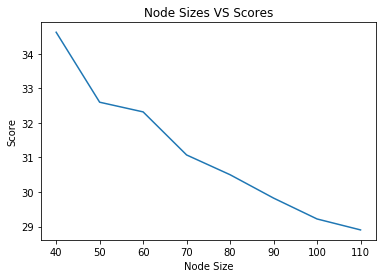

In [6]:
# Use functionality to determine optimal node count, given one layer
node_sizes = np.arange(40, 120, 10)
scores = []
for count in node_sizes:
    structure = [count]
    score = cross_validate(structure)
    print("Layer 1 has {} nodes - yields MSE = {}".format(count, score))
    scores.append(score)

min_mse_size = node_sizes[ np.argmin(scores) ]
print("With 1 layer optimal node count is:", min_mse_size)

# quick plot of MSE as function of node size
plt.plot(node_sizes, scores)
plt.xlabel("Node Size")
plt.ylabel("Score")
plt.title("Node Sizes VS Scores")
plt.show()

In [10]:
structures=[[10,20],[100,200],[40,40,40],[100,200,300],[10,20,30,40],[100,200,300,400]]
mse_scores=[]

for i,structure in enumerate(structures):
    score = cross_validate(structure)
    mse_scores.append(score)
    print('Model {} with parameters {} has MSE of {}.'.format(i,structures[i],score))

index_mse = np.argmin(mse_scores)
print (structures[i])

Epoch 1/5
363/363 [==============================] - 2s 6ms/step - loss: 350.9994 - mean_squared_error: 350.9994
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 52.5887 - mean_squared_error: 52.5887
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 31.2361 - mean_squared_error: 31.2361
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 25.6658 - mean_squared_error: 25.6658
Epoch 5/5
41/41 [==============================] - 1s 14ms/step
K-FOLD = 1| MSE = 31.73149254263901
Epoch 1/5
363/363 [==============================] - 2s 7ms/step - loss: 477.6734 - mean_squared_error: 477.6734
Epoch 2/5
363/363 [==============================] - 1s 3ms/step - loss: 136.8399 - mean_squared_error: 136.8399
Epoch 3/5
363/363 [==============================] - 1s 3ms/step - loss: 60.9522 - mean_squared_error: 60.9522
Epoch 4/5
363/363 [==============================] - 1s 3ms/step - loss: 38.6574 - mean_squared_error: 38.6574
Epoch 

364/364 [==============================] - 3s 8ms/step - loss: 207.6029 - mean_squared_error: 207.6029
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 39.7423 - mean_squared_error: 39.7423
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 26.9066 - mean_squared_error: 26.9066
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 20.1346 - mean_squared_error: 20.1346
Epoch 5/5
40/40 [==============================] - 1s 20ms/step
K-FOLD = 6| MSE = 11.13415470123291
Epoch 1/5
364/364 [==============================] - 3s 8ms/step - loss: 172.8357 - mean_squared_error: 172.8357
Epoch 2/5
364/364 [==============================] - 1s 3ms/step - loss: 27.4744 - mean_squared_error: 27.4744
Epoch 3/5
364/364 [==============================] - 1s 3ms/step - loss: 21.4486 - mean_squared_error: 21.4486
Epoch 4/5
364/364 [==============================] - 1s 3ms/step - loss: 17.8348 - mean_squared_error: 17.8348
Epoch 5/5
40/40 [=

Epoch 1/5
363/363 [==============================] - 4s 10ms/step - loss: 53.8041 - mean_squared_error: 53.8041
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 24.1080 - mean_squared_error: 24.1080
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 20.2679 - mean_squared_error: 20.2679
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 18.6889 - mean_squared_error: 18.6889
Epoch 5/5
41/41 [==============================] - 1s 26ms/step
K-FOLD = 1| MSE = 15.236323472930163
Epoch 1/5
363/363 [==============================] - 4s 11ms/step - loss: 59.0689 - mean_squared_error: 59.0689
Epoch 2/5
363/363 [==============================] - 1s 4ms/step - loss: 28.3088 - mean_squared_error: 28.3088
Epoch 3/5
363/363 [==============================] - 1s 4ms/step - loss: 22.9327 - mean_squared_error: 22.9327
Epoch 4/5
363/363 [==============================] - 1s 4ms/step - loss: 19.9228 - mean_squared_error: 19.9228
Epoch 5/5

The best model in this case has the four layers, and an MSE of 25.7